# Running uniqed on a chirp signal

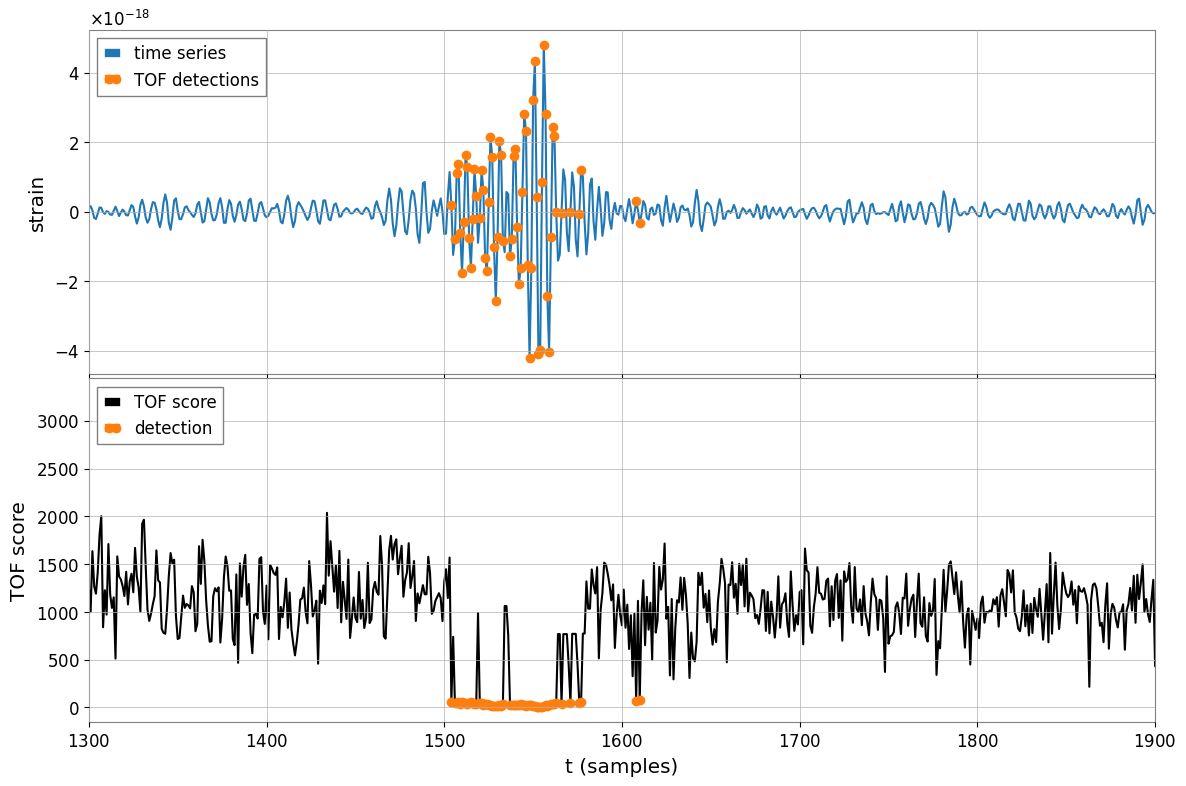

In [4]:
# Read data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from gwpy.timeseries import TimeSeries
from uniqed.runners.tof_run import detect_outlier

downsample_ratio = 100

fn = 'data/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5'
ts = TimeSeries.read(fn,format='hdf5.losc')
ts = ts[int(11*ts.size/22):int(13*ts.size/22)]
ts = ts[int(ts.size/4):int(ts.size/2)]
times = ts.times.value[::downsample_ratio]
data = ts.value[::downsample_ratio]

res_df = detect_outlier(pd.DataFrame(data)[[0]], cutoff_n=80)

# plot the results
fig, axs = plt.subplots(2, 1, figsize=(12,8), sharex=True)

axs[0].plot(res_df[0], color='tab:blue', label='time series')
axs[0].plot(res_df.query("TOF==1")[0], lw=0, marker='o',
         color='tab:orange', label='TOF detections')
axs[0].set_ylabel('strain')
axs[0].legend(loc='upper left', framealpha=1)

axs[1].plot(res_df['TOF_score'], color='k', label='TOF score')
axs[1].plot(res_df.query("TOF==1")['TOF_score'], lw=0, marker='o',
         color='tab:orange', label='detection')
axs[1].set_ylabel('TOF score')
axs[1].set_xlabel('t (samples)')
axs[1].legend(loc='upper left', framealpha=1)

axs[0].grid(True)
axs[0].set_xlim(1300, 1900)
axs[1].grid(True)
axs[1].set_xlim(1300, 1900)

fig.tight_layout(rect=[0, 0, 1, 1], pad=1, h_pad=0, w_pad=0)
plt.show()

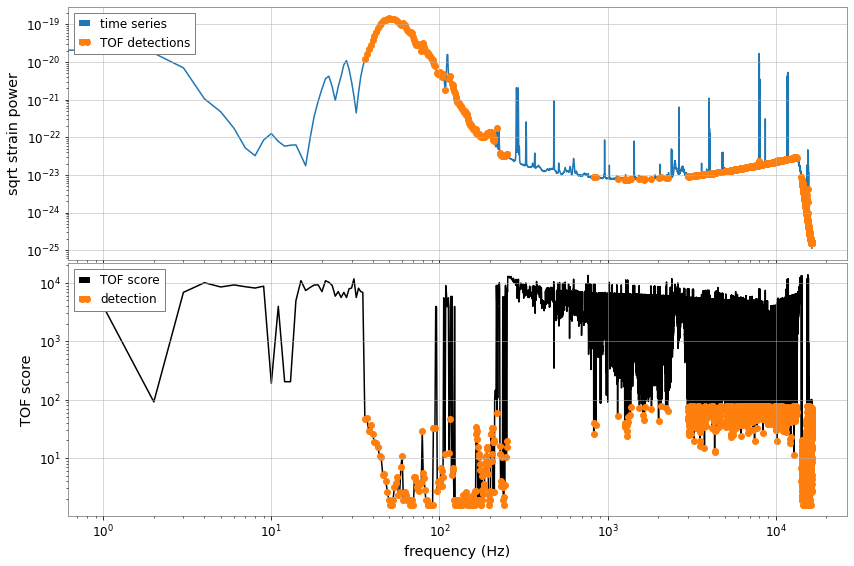

In [6]:
# Redo TOF analysis in frequency domain (ASD)
# This probably makes no sense to do

data = np.array(strain.asd(fftlength=8))

res_df = detect_outlier(pd.DataFrame(data)[[0]], cutoff_n=80)

# plot the results
fig, axs = plt.subplots(2, 1, figsize=(12,8), sharex=True)

axs[0].loglog(res_df[0], color='tab:blue', label='time series')
axs[0].loglog(res_df.query("TOF==1")[0], lw=0, marker='o',
         color='tab:orange', label='TOF detections')
axs[0].set_ylabel('sqrt strain power')
axs[0].legend(loc='upper left', framealpha=1)

axs[1].loglog(res_df['TOF_score'], color='k', label='TOF score')
axs[1].loglog(res_df.query("TOF==1")['TOF_score'], lw=0, marker='o',
         color='tab:orange', label='detection')
axs[1].set_ylabel('TOF score')
axs[1].set_xlabel('frequency (Hz)')
axs[1].legend(loc='upper left', framealpha=1)

axs[0].grid(True)
axs[1].grid(True)

fig.tight_layout(rect=[0, 0, 1, 1], pad=1, h_pad=0, w_pad=0)
plt.show()

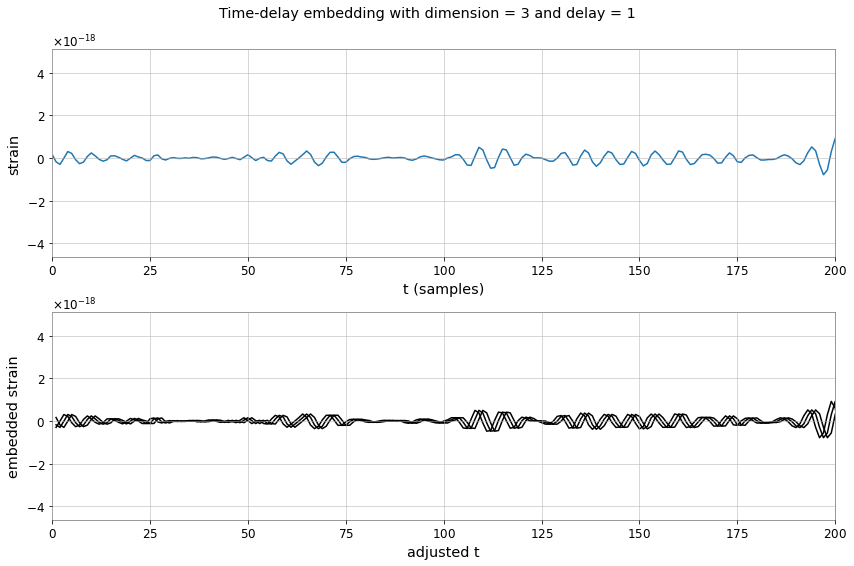

In [71]:
# Let's see if we can tease out what the time-delay embedding is actually doing

from uniqed.transformers.transformers import (
    TimeDelayEmbedder,
    TransformYTrue,
    _make_result_df,
)

data = np.array(strain.data)[::100]
time_series = pd.DataFrame(data)[[0]]
np_time_series = data

embedding_dimension = 3
embedding_delay = 1

embedded_time_series = TimeDelayEmbedder(
    d=embedding_dimension, tau=embedding_delay
).fit_transform(np_time_series)
new_time_axis = TransformYTrue(
    d=embedding_dimension, tau=embedding_delay
).fit_transform(time_series.index)

# plot the results
fig, axs = plt.subplots(2, 1, figsize=(12,8))
fig.suptitle(
    f'Time-delay embedding with dimension = {embedding_dimension} and delay = {embedding_delay}')

axs[0].plot(time_series, color='tab:blue')
axs[0].set_ylabel('strain')
axs[0].set_xlabel('t (samples)')
axs[0].grid(True)
axs[0].set_xlim(0,200)

axs[1].plot(new_time_axis, embedded_time_series, color='k')
axs[1].set_ylabel('embedded strain')
axs[1].set_xlabel('adjusted t')
axs[1].grid(True)
axs[1].set_xlim(0,200)

fig.tight_layout(rect=[0, 0, 1, 1], pad=1, h_pad=0, w_pad=0)
plt.show()